In [1]:
# Homework

# Undergraduate student:
# A person throws a ball upwards at a speed of 10 m/s, please calculate the trajectory using Runge-Kutta method
# and plot height (z) vs time (t).

For a ball thrown upward, we can express Newton's 2nd law as
\begin{equation}
    F_z = ma_z = -mg,\\
\end{equation}
hence,
\begin{equation}
    \ddot{z}(t) = -g
\end{equation}
In order to solve this equation with Runge-Kutta method, we must first express this second order ODE as a system of first order ODEs:
\begin{eqnarray}
    \dot{z}(t) = v_z(t)\\
    \dot{v}_z(t) = -g. 
\end{eqnarray}
Next, we can organize this system of ODEs into a vector equation:
\begin{equation}
    \dot{\textbf{w}}(t) = \textbf{f}(t,\textbf{w})
\end{equation}
where
\begin{equation}
    \textbf{w}(t) \equiv (z(t),v_z(t))
\end{equation}
and
\begin{equation}
    \textbf{f}(t,\textbf{w}) \equiv (v_z(t),-g). 
\end{equation}
Now we can use RK-4 to solve this vector ODE for several time steps using the following initial conditions:
\begin{equation}
    z(0)=0, v_z(0)=10m/s.
\end{equation}

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def runge_kutta_4(t,w,f,h):
    w = np.asarray(w)
    
    k1 = h * np.asarray(f(t, w))
    k2 = h * np.asarray(f(t+h/2, w+k1/2))
    k3 = h * np.asarray(f(t+h/2, w+k2/2))
    k4 = h * np.asarray(f(t+h, w+k3))
    
    w = w + (k1 + 2*k2 + 2*k3 + k4) / 6
    return w

Text(0, 0.5, 'z (m)')

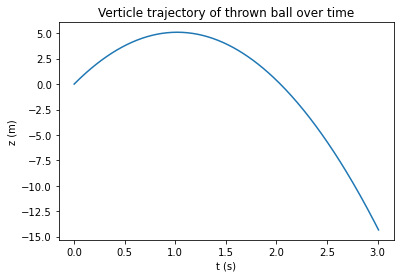

In [4]:
t = 0       # s
h = 0.01    # s
w = [0,10]  # [m, m/s]
t_end = 3   # s
g = 9.81    # m/s^2

f = lambda t,w: [w[1],-g]

ts = [t]
zs = [w[0]]
while t < t_end:
    w = runge_kutta_4(t,w,f,h)
    t = t + h
    ts.append(t)
    zs.append(w[0])
    
plt.plot(ts, zs)
plt.title('Verticle trajectory of thrown ball over time')
plt.xlabel('t (s)')
plt.ylabel('z (m)')